In [59]:
from predict_cont import *
import matplotlib.pyplot as plt

(0.0, 255.0)

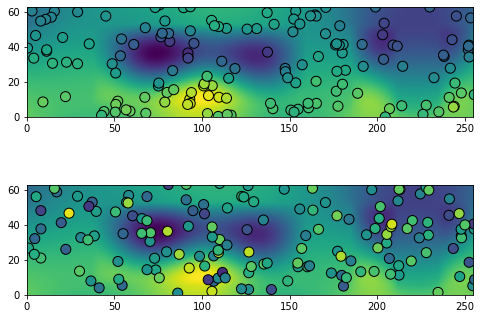

In [60]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

im = axs[0].imshow(hr_fields[0])

cbar = fig.colorbar(im, ax=axs[0])
color_func = lambda num: cbar.cmap((num - cbar.vmin)/(cbar.vmax - cbar.vmin))

cbar.remove()

hr_eps, lr_fields, pt_coos, pt_vals, hr_fields = dataloader.MetaGratingDataLoader(return_hres=True, n_samp_pts=150, lr_data_filename='data/metanet_lr_data_downsamp8.npy' )[11]
net = torch.load('models/model_mlp_run4_2.pth')

sr_vals = predict_fields(net, lr_fields, hr_eps, pt_coos).detach().numpy()[0]

xs = ((1+pt_coos[:, 0])/2)*hr_fields[0].shape[0]
zs = ((1+pt_coos[:, 1])/2)*hr_fields[0].shape[1]
axs[0].scatter(x=zs, y=xs, c=color_func(sr_vals[:,0]), s=100, edgecolors='black')


hr_eps, lr_fields, pt_coos, pt_vals, hr_fields = dataloader.MetaGratingDataLoader(return_hres=True, n_samp_pts=150, lr_data_filename='data/metanet_lr_data_downsamp16.npy' )[11]
net = torch.load('models/model_mlp_run1_2.pth')

sr_pt_fields = predict_fields(net, lr_fields, hr_eps, pt_coos).detach().numpy()[0]

axs[1].imshow(hr_fields[0])

xs = ((1+pt_coos[:, 0])/2)*hr_fields[0].shape[0]
zs = ((1+pt_coos[:, 1])/2)*hr_fields[0].shape[1]
axs[1].scatter(x=zs, y=xs, c=color_func(sr_vals[:,0]), s=100, edgecolors='black')

axs[0].set_ylim(0, 63)
axs[1].set_ylim(0, 63)

axs[0].set_xlim(0, 255)
axs[1].set_xlim(0, 255)

